In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython import display

In [17]:
def data_prep(source):
    data = (pd.read_csv(source, header=14)
            .loc[3:]
            .astype(np.float16)
            )
    return data

In [20]:
source = "2023-08-26 - 19-03-46 - Sebring 12h Course - P1.csv"

data = data_prep(source)

C:\Users\Noah\AppData\Local\Temp\ipykernel_30012\1058944698.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84) have mixed types. Specify dtype option on import or set low_memory=False.
  data = (pd.read_csv(source, header=14)


In [13]:
data.head()

,Time,Distance,Ground Speed,Engine RPM,Throttle Pos,Brake Pos,Clutch Pos,Steering,G Force Lat,G Force Long,...,Toe FL,Toe FR,Toe RL,Toe RR,Front 3rd Pos,Rear 3rd Pos,Brake Pressure FL,Brake Pressure FR,Brake Pressure RL,Brake Pressure RR
3,0.000000,0.0,2.130859,4088.0,38.40625,0.0,0.0,5.382812,0.0,-0.27002,...,0.018906,0.020096,0.0013,-0.0014,22.640625,21.125000,0.0,0.0,0.0,0.0
4,0.010002,0.0,2.220703,4072.0,38.40625,0.0,0.0,5.511719,0.0,-0.27002,...,0.019302,0.020493,0.0013,-0.0014,22.625000,21.156250,0.0,0.0,0.0,0.0
5,0.020004,0.0,2.310547,4054.0,38.40625,0.0,0.0,5.636719,0.0,-0.27002,...,0.019806,0.020996,0.0013,-0.0014,22.593750,21.187500,0.0,0.0,0.0,0.0
6,0.029999,0.0,2.400391,4038.0,38.40625,0.0,0.0,5.761719,0.0,-0.26001,...,0.020203,0.021393,0.0013,-0.0014,22.546875,21.203125,0.0,0.0,0.0,0.0
7,0.040009,0.0,2.490234,4022.0,38.40625,0.0,0.0,5.886719,0.0,-0.26001,...,0.020706,0.021896,0.0013,-0.0014,22.500000,21.234375,0.0,0.0,0.0,0.0


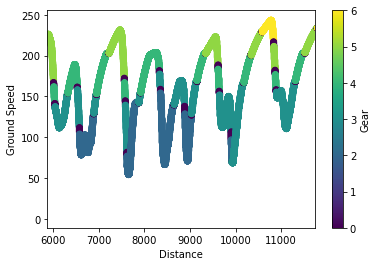

In [33]:
f, ax = plt.subplots()
points = plt.scatter(x=data['Distance'], y=data['Ground Speed'], c=data['Gear'])
plt.xlim(5871.8, 5871.8*2) # remove the outlap (track distance for Sebring is 6021 meters)
plt.xlabel("Distance")
plt.ylabel("Ground Speed")
f.colorbar(points).set_label("Gear")
plt.show()

The first thing to note is the poor shifting towards the end of the lap. Sebring does have a long last corner but coming down from 6th earlier might help with rotating the car into the final turn. 

One of the first things I will check out is if we are getting unneccesary wheel spin at any point during the lap. 

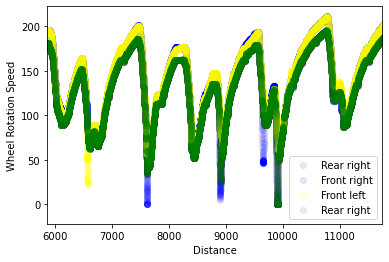

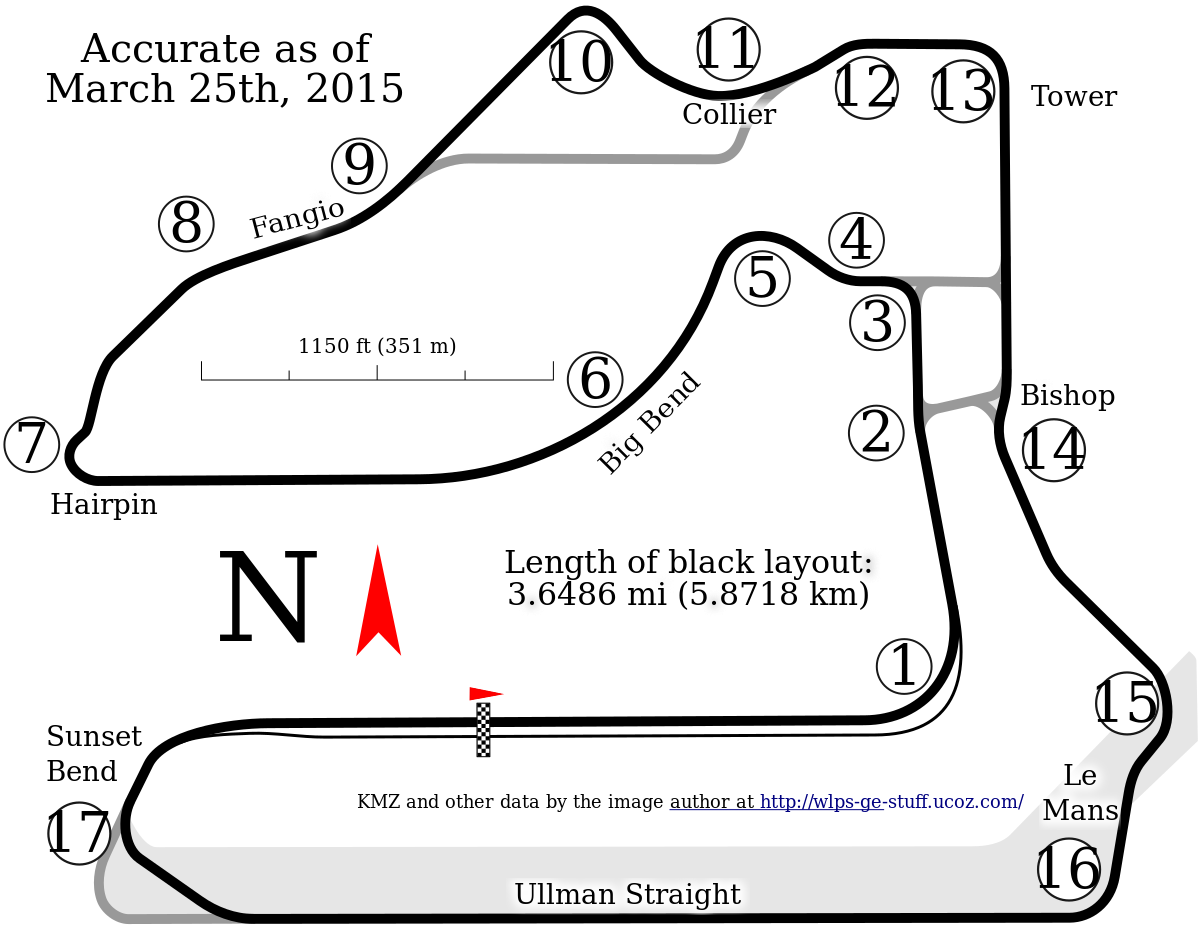

In [52]:
x = data['Distance']
plt.scatter(x=x,
            y=data['Wheel Rot Speed RR'],
            c = "purple",
            alpha = 0.1,
            label = "Rear right")
plt.scatter(x=x,
            y=data['Wheel Rot Speed FR'],
            c = "blue",
            alpha = 0.1,
            label = "Front right")
plt.scatter(x=x,
            y=data['Wheel Rot Speed FL'],
            c = "yellow",
            alpha = 0.1,
            label = "Front left")
plt.scatter(x=x,
            y=data['Wheel Rot Speed RR'],
            c = "green",
            alpha = 0.1,
            label = "Rear right")
plt.xlabel("Distance")
plt.ylabel("Wheel Rotation Speed")
plt.legend()
plt.xlim(5871.8, 5871.8*2)
plt.show()
display.Image("Sebring_International_Raceway.png", width = 400)

Looking at each wheel's rotation speed as they change along the distance of the lap. This can show locations where were suffering from over/under-steer. This plot gives a great representation since we can see I am losing the front end in several slow speed corners. We can follow the track map to see where these locations are. I am struggling with grip in turns 3, 7, 13, 14 and 16. This loss at turn 16 is a slipping of the rear tires. We should now diagnose if these slips are due to driver errors (power oversteer) or something that can be solved with set up changes. 

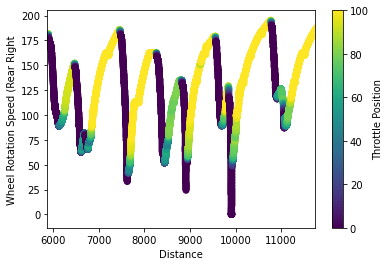

In [53]:
x = data['Distance']
c = data['Throttle Pos']
y = data['Wheel Rot Speed RR']

f, ax = plt.subplots()
points = plt.scatter(x=x, y=y, c=c)
plt.xlim(5871.8, 5871.8*2)
plt.xlabel("Distance")
plt.ylabel("Wheel Rotation Speed (Rear Right")
f.colorbar(points).set_label("Throttle Position")
plt.show()

By coloring the chart of the rear right wheel speed we can still see the locations where we lose the rear right, we can see we are not coming off the throttle appropriately as we turn in. 